<a href="https://colab.research.google.com/github/Niketbhoye/Diabetic-Retinopathy-Detection/blob/main/Diabetic_Retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetic Retinopathy Detection using Artificial Intelligence**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# List the files in the specified folder
folder_path = '/content/drive/MyDrive/Dataset'
files = os.listdir(folder_path)
print(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Moderate', 'Severe', 'No_DR', 'Mild', 'Proliferate_DR']


# TASK #2: IMPORT LIBRARIES/DATASETS

>



In [ ]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [ ]:
pip install ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


In [ ]:
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
os.listdir('/content/drive/My Drive/Dataset')
# return all the folders in Dataset folder

['Moderate', 'Severe', 'No_DR', 'Mild', 'Proliferate_DR']

In [ ]:
os.listdir(os.path.join('drive','MyDrive','Dataset', 'Mild'))
# to print all images in Mild folder inside Dataset folder

['fe674c2f73f5.png',
 'cc12453ea915.png',
 'f6f7dba7104d.png',
 'e2a233493b90.png',
 'da1fb35f5df9.png',
 'fd62bd0db4f1.png',
 'eeb231c3ef1f.png',
 'f7fec8935126.png',
 'ee78ce914066.png',
 'd567a1a22d33.png',
 'f5650eb52640.png',
 'fecf4c5ae84b.png',
 'f72ef9ceeaa8.png',
 'fea14b3d44b0.png',
 'f762c272c522.png',
 'fca931da5c5e.png',
 'fb6b8200b7f8.png',
 'f481f76a6b75.png',
 'fdd18ccbbdc5.png',
 'cd5714db652d.png',
 'cae51154e1ce.png',
 'd6e26fe51dce.png',
 'ca6842bfcbc9.png',
 'db690e2d02f8.png',
 'e96bd80a8a53.png',
 'cb2f3c5d71a7.png',
 'c1e6fa1ad314.png',
 'f55e1d2a19e4.png',
 'ef8109305128.png',
 'e55188915f9d.png',
 'f0c13be90519.png',
 'ead23cc922ed.png',
 'c9485c38fdd5.png',
 'dbd062558b81.png',
 'fe2df69676cf.png',
 'f47a2a4a0411.png',
 'e07045d7c5f7.png',
 'ca30a97e9d13.png',
 'dd19428c3d29.png',
 'd1cad012a254.png',
 'eed4afc8ec83.png',
 'c1ebe785503a.png',
 'c102db7634d8.png',
 'ca7140ecf389.png',
 'cc9270f06b65.png',
 'e9286ddf6ffe.png',
 'ca1036496659.png',
 'cab3dfa7962

In [ ]:
# Check the number of images in the dataset
train = [] # actual input images
label = [] # classes of that images

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('/content/drive/My Drive/Dataset'):
  train_class = os.listdir(os.path.join('drive','MyDrive','Dataset', i))
  for j in train_class:
    img = os.path.join('drive','MyDrive','Dataset', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))


Number of train images : 2854 



In [ ]:
train

['drive/MyDrive/Dataset/Moderate/f9aa35187bf3.png',
 'drive/MyDrive/Dataset/Moderate/f460608cf4cc.png',
 'drive/MyDrive/Dataset/Moderate/f45f1485c940.png',
 'drive/MyDrive/Dataset/Moderate/fd48cf452e9d.png',
 'drive/MyDrive/Dataset/Moderate/fc4c2d35c6f8.png',
 'drive/MyDrive/Dataset/Moderate/e6f0ce5bf282.png',
 'drive/MyDrive/Dataset/Moderate/ffec9a18a3ce.png',
 'drive/MyDrive/Dataset/Moderate/fe37f4492920.png',
 'drive/MyDrive/Dataset/Moderate/fa3e544a7401.png',
 'drive/MyDrive/Dataset/Moderate/f999c6921e6d.png',
 'drive/MyDrive/Dataset/Moderate/f9e779a13204.png',
 'drive/MyDrive/Dataset/Moderate/ff52392372d3.png',
 'drive/MyDrive/Dataset/Moderate/fc4d69128e7c.png',
 'drive/MyDrive/Dataset/Moderate/fba493e17448.png',
 'drive/MyDrive/Dataset/Moderate/fac399455195.png',
 'drive/MyDrive/Dataset/Moderate/e34fa07bd64d.png',
 'drive/MyDrive/Dataset/Moderate/ffa47f6a7bf4.png',
 'drive/MyDrive/Dataset/Moderate/fc603cbedb41.png',
 'drive/MyDrive/Dataset/Moderate/e7a372a1c3a4.png',
 'drive/MyDr

In [ ]:
label

['Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',

<Axes: xlabel='count'>

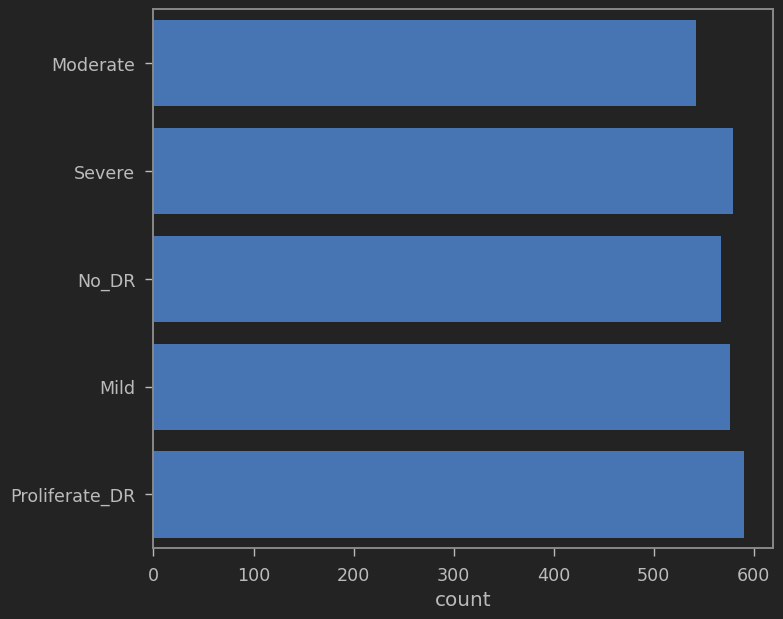

In [ ]:
# print out the count plot for all classes using seaborn
# sns.countplot()
sns.countplot(label)

# TASK #3: PERFORM DATA EXPLORATION AND DATA VISUALIZATION

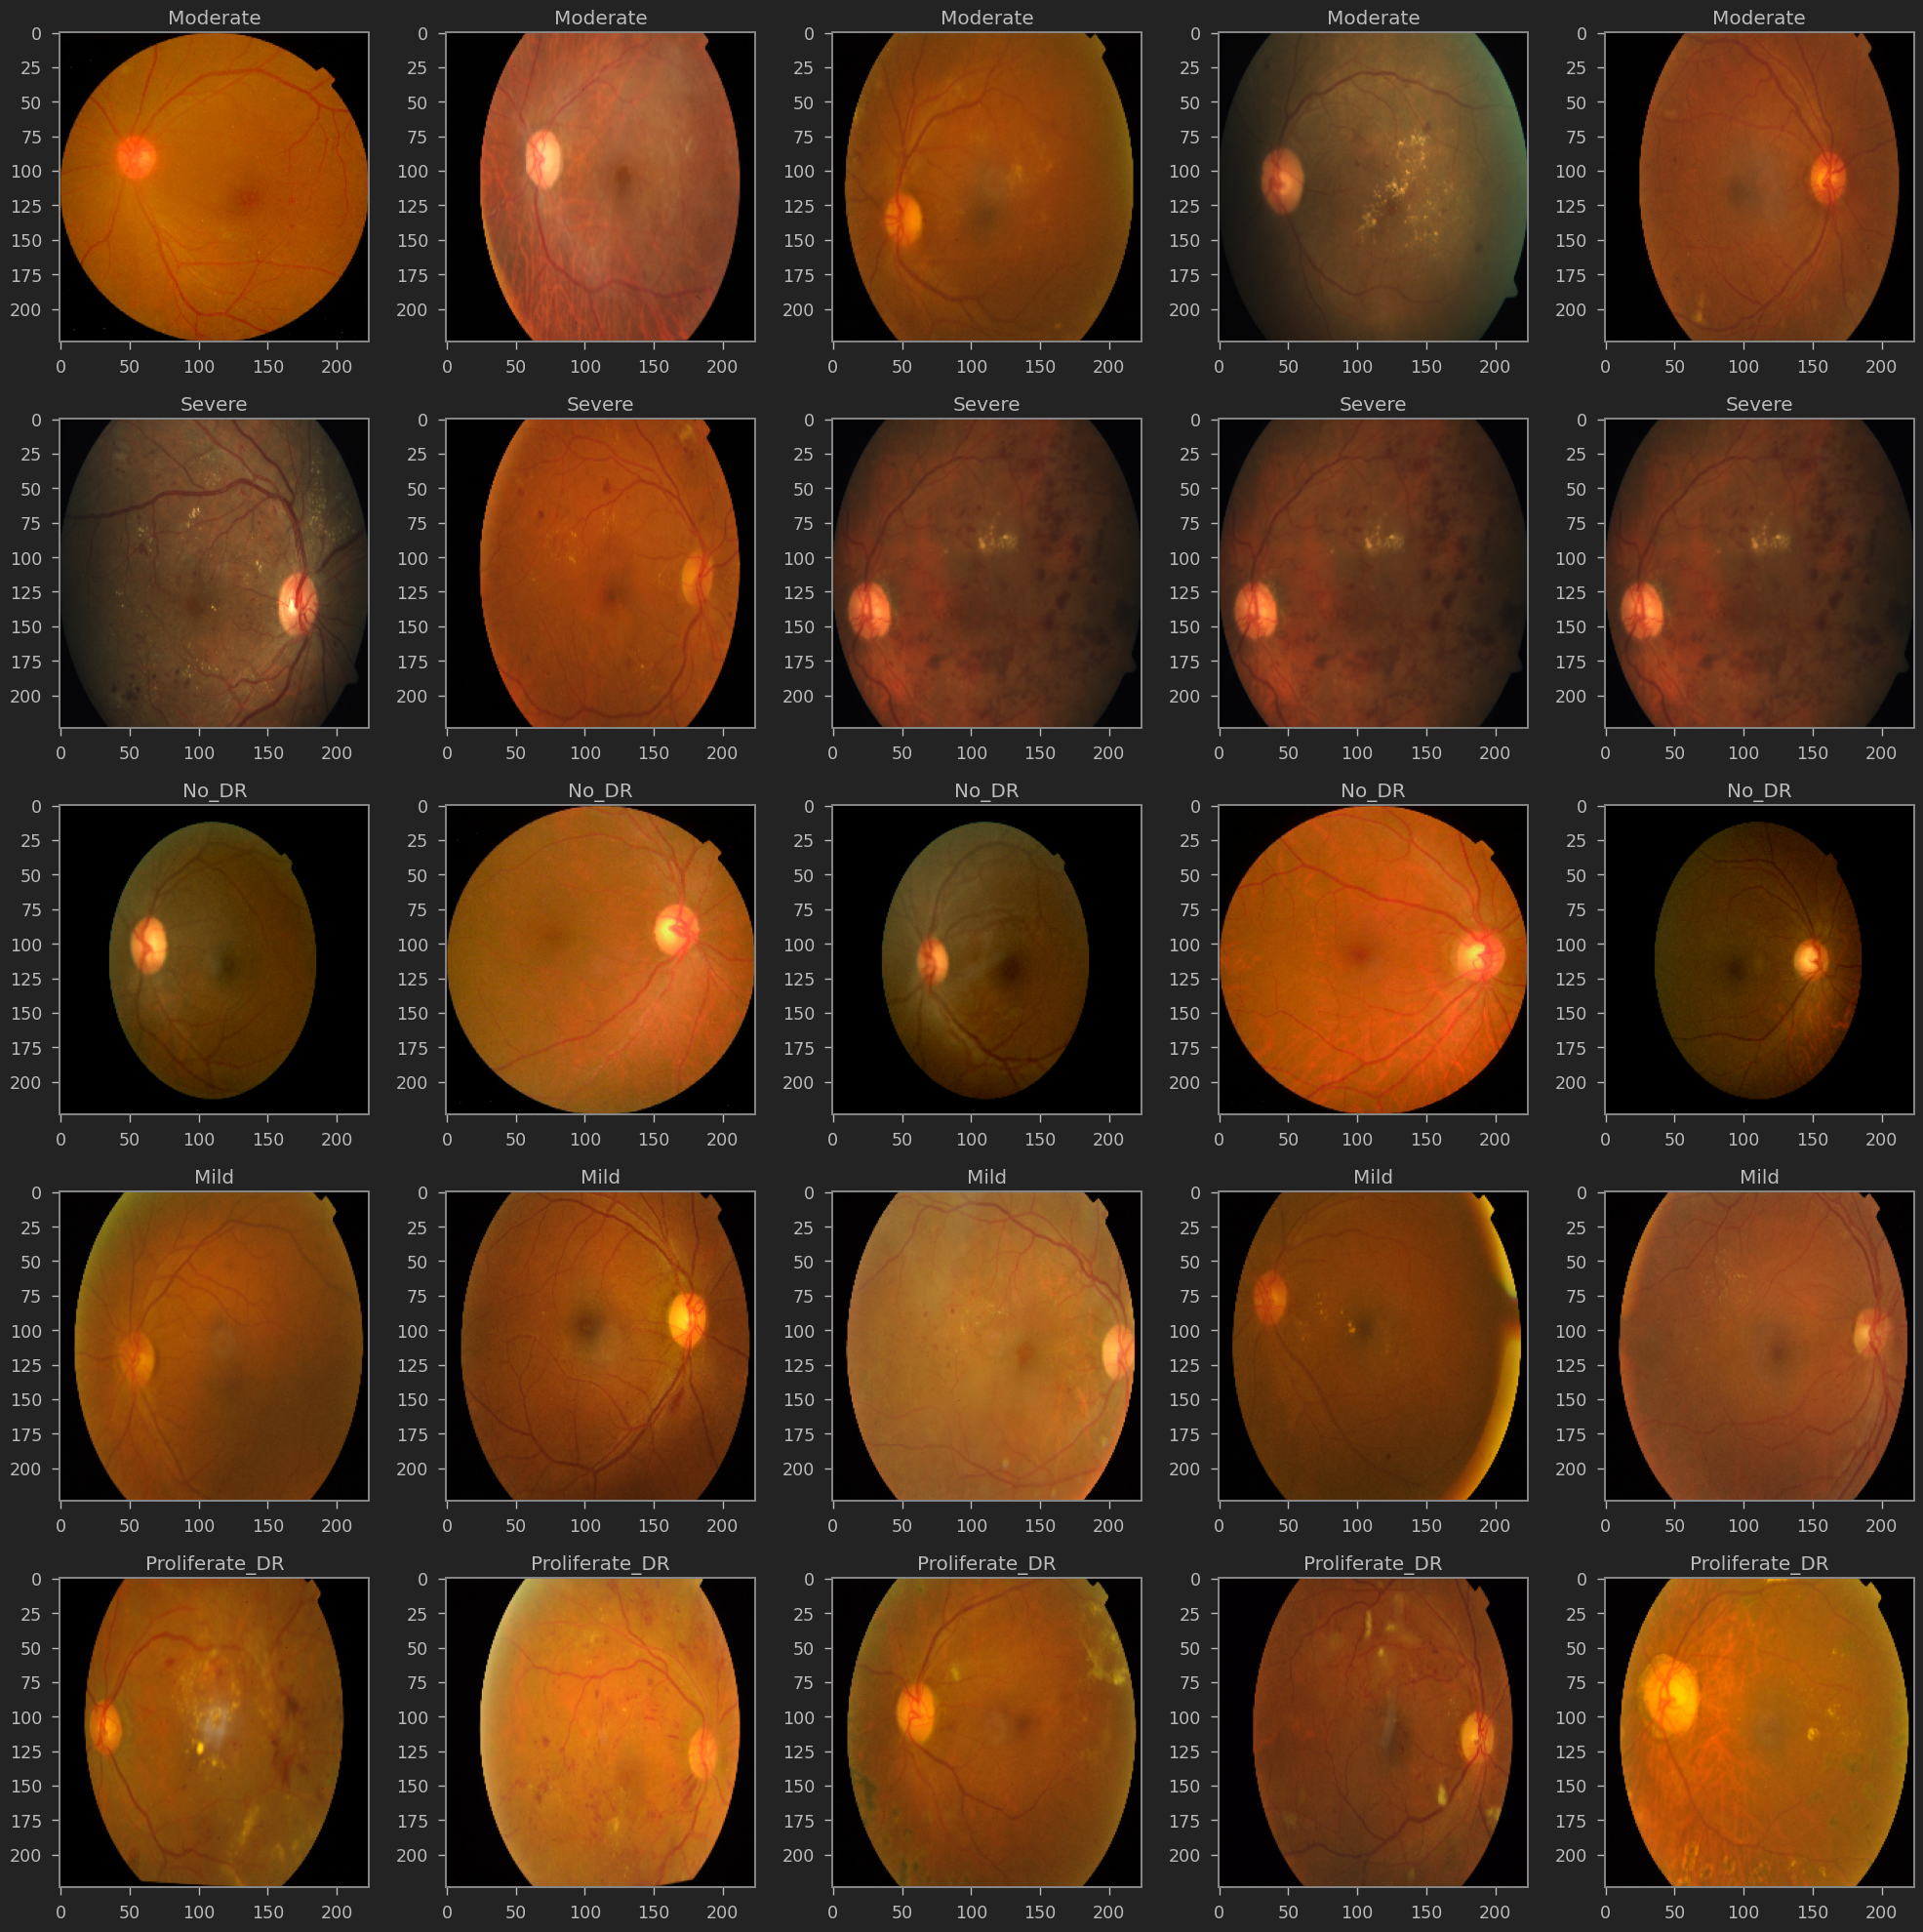

In [ ]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('/content/drive/MyDrive/Dataset'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('drive','MyDrive','Dataset', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('drive','MyDrive','Dataset', i, train_class[j])
    img = PIL.Image.open(img)

    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)
  count += 1

fig.tight_layout()


In [ ]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('/content/drive/My Drive/Dataset'):
  train_class = os.listdir(os.path.join('drive','MyDrive','Dataset', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Moderate = 542 

Number of images in Severe = 579 

Number of images in No_DR = 567 

Number of images in Mild = 576 

Number of images in Proliferate_DR = 590 



In [ ]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

Image          Labels
0       drive/MyDrive/Dataset/Moderate/f9aa35187bf3.png        Moderate
1       drive/MyDrive/Dataset/Moderate/f460608cf4cc.png        Moderate
2       drive/MyDrive/Dataset/Moderate/f45f1485c940.png        Moderate
3       drive/MyDrive/Dataset/Moderate/fd48cf452e9d.png        Moderate
4       drive/MyDrive/Dataset/Moderate/fc4c2d35c6f8.png        Moderate
...                                                 ...             ...
2849  drive/MyDrive/Dataset/Proliferate_DR/0e82bcacc...  Proliferate_DR
2850  drive/MyDrive/Dataset/Proliferate_DR/165cd2070...  Proliferate_DR
2851  drive/MyDrive/Dataset/Proliferate_DR/1a90fad9f...  Proliferate_DR
2852  drive/MyDrive/Dataset/Proliferate_DR/281d7b7c7...  Proliferate_DR
2853  drive/MyDrive/Dataset/Proliferate_DR/281d7b7c7...  Proliferate_DR

[2854 rows x 2 columns]

In [ ]:
No_images_per_class

[542, 579, 567, 576, 590]

In [ ]:
Class_name

['Moderate', 'Severe', 'No_DR', 'Mild', 'Proliferate_DR']

([<matplotlib.patches.Wedge at 0x7ce436f0d2a0>,
 [Text(0.9099655357293223, 0.6180313291289105, 'Moderate'),
  Text(-0.2825561595473861, 1.0630907847883135, 'Severe'),
  Text(-1.098650756698146, 0.054465721390534884, 'No_DR'),
  Text(-0.3897169775084708, -1.028649929490914, 'Mild'),
  Text(0.8760560001377119, -0.6652261905718336, 'Proliferate_DR')],
 [Text(0.4963448376705394, 0.33710799770667843, '19.0%'),
  Text(-0.15412154157130148, 0.5798677007936255, '20.3%'),
  Text(-0.5992640491080795, 0.029708575303928116, '19.9%'),
  Text(-0.21257289682280223, -0.5610817797223167, '20.2%'),
  Text(0.4778487273478428, -0.3628506494028183, '20.7%')])

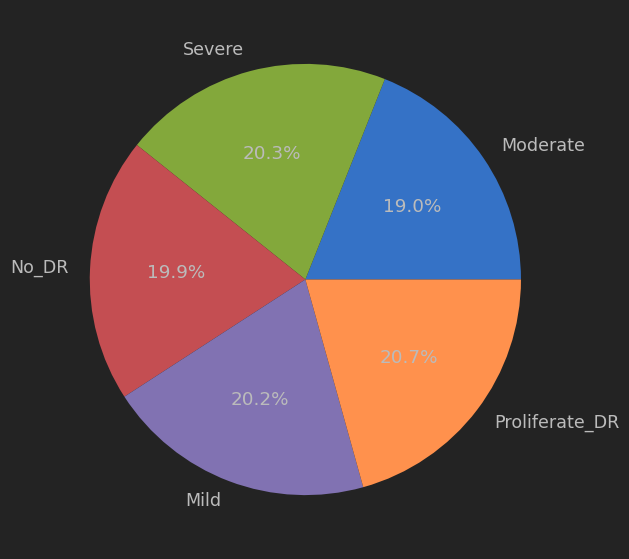

In [ ]:
# Plot a pie chart showing the percentage of samples per class.

fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels=Class_name, autopct='%1.1f%%')

# TASK #4: PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [ ]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [ ]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255, # Normalizes pixel values to [0, 1].
        shear_range = 0.2,  # Applies random shearing.
        validation_split = 0.15) # Reserves 15% of training data for validation.

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Creating datagenerator for training, validation and test dataset.
!pwd

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

/content
Found 1941 validated image filenames belonging to 5 classes.
Found 342 validated image filenames belonging to 5 classes.
Found 571 validated image filenames belonging to 5 classes.


## **Not Required**

In [ ]:
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Assuming your train_generator, validation_generator, and test_generator are already set up

# Function to build the models
def build_pretrained_model(base_model, num_classes):
    base_model.trainable = False  # Freeze the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # GlobalAveragePooling2D is safer than Flatten
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Define number of classes for diabetic retinopathy classification
num_classes = 5  # Example: 5 classes for different stages of diabetic retinopathy

# Prepare the model architectures with pretrained weights
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build models with custom classification layers
vgg16_model = build_pretrained_model(vgg16_base, num_classes)
inception_model = build_pretrained_model(inception_base, num_classes)
resnet50_model = build_pretrained_model(resnet50_base, num_classes)

# Compile the models
optimizer = tf.keras.optimizers.Adam()

vgg16_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
inception_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for EarlyStopping and ModelCheckpoint
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/best_model_vgg16.h5', verbose=1, save_best_only=True)

# Training VGG16 Model
try:
    history_vgg16 = vgg16_model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        callbacks=[checkpointer, earlystopping]
    )
except Exception as e:
    print("An error occurred during training:", e)

# Load best weights and evaluate VGG16 Model
try:
    vgg16_model.load_weights('/content/drive/MyDrive/best_model_vgg16.h5')
    vgg16_evaluate = vgg16_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
    print(f'VGG16 Test Accuracy: {vgg16_evaluate[1]:.4f}')
except Exception as e:
    print("An error occurred while loading weights or evaluating the model:", e)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
 5/60 [=>............................] - ETA: 5:21 - loss: 1.7414 - accuracy: 0.1937

KeyboardInterrupt: 

### **VGG16 Model (Required)**

In [ ]:
# Import necessary libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from google.colab import drive

# Mount Google Drive to save/load model weights
drive.mount('/content/drive')

# Creating data generators for training, validation, and test datasets.
# Assuming 'train' and 'test' DataFrames are already defined
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),  # Updated to 256x256
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),  # Updated to 256x256
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation'
)

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),  # Updated to 256x256
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32
)

# Build VGG16 model with custom top layers
def build_vgg16_model(num_classes):
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))  # Updated input shape to 256x256
    vgg16_base.trainable = False  # Freeze the base model layers

    x = vgg16_base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(2048, activation='relu')(x)  # Add a dense layer with 2048 units
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=vgg16_base.input, outputs=predictions)
    return model

# Define the number of classes
num_classes = 5  # Example: 5 classes for diabetic retinopathy

# Build VGG16 model
vgg16_model = build_vgg16_model(num_classes)

# Unfreeze a portion of the layers for fine-tuning
for layer in vgg16_model.layers[:15]:  # You may adjust how many layers to freeze/unfreeze
    layer.trainable = False

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=1e-4)
vgg16_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Calculate class weights for imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

# Set up callbacks for early stopping and saving the best model
earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/best_model_vgg16.h5', verbose=1, save_best_only=True)

# Train the VGG16 model
history_vgg16 = vgg16_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=22,  # Adjust epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpointer, earlystopping],
    class_weight=class_weights
)

# Load the best weights and evaluate the model
vgg16_model.load_weights('/content/drive/MyDrive/best_model_vgg16.h5')
vgg16_evaluate = vgg16_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
print(f'VGG16 Test Accuracy: {vgg16_evaluate[1]:.4f}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1941 validated image filenames belonging to 5 classes.
Found 342 validated image filenames belonging to 5 classes.
Found 571 validated image filenames belonging to 5 classes.
Epoch 1/22
60/60 [==============================] - ETA: 0s - loss: 1.6171 - accuracy: 0.2441
Epoch 1: val_loss improved from inf to 1.50343, saving model to /content/drive/MyDrive/best_model_vgg16.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 469s 8s/step - loss: 1.6171 - accuracy: 0.2441 - val_loss: 1.5034 - val_accuracy: 0.4062
Epoch 2/22
60/60 [==============================] - ETA: 0s - loss: 1.5091 - accuracy: 0.3311
Epoch 2: val_loss improved from 1.50343 to 1.43223, saving model to /content/drive/MyDrive/best_model_vgg16.h5
60/60 [==============================] - 64s 1s/step - loss: 1.5091 - accuracy: 0.3311 - val_loss: 1.4322 - val_accuracy: 0.3969
Epoch 3/22
60/60 [==============================] - ETA: 0s - loss: 1.4437 - accuracy: 0.3798
Epoch 3: val_loss improved from 1.43223 to 1.35410, saving model to /content/drive/MyDrive/best_model_vgg16.h5
60/60 [==============================] - 64s 1s/step - loss: 1.4437 - accuracy: 0.3798 - val_loss: 1.3541 - val_accuracy: 0.4938
Epoch 4/22
60/60 [==============================] - ETA: 0s - loss: 1.3901 - accuracy: 0.4123
Epoch 4: val_loss improved from 1.35410 to 1.31997, saving model to /content/drive/MyDrive/best_model_vgg16.

In [ ]:
import os
print(os.path.exists("/content/drive/MyDrive/best_model_vgg16.h5"))

True


# **Not Required**

In [ ]:
# Import necessary libraries
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import drive  # Import to mount Google Drive

# Mount Google Drive
drive.mount('/content/drive')

# Number of classes (adjust this based on your dataset)
num_classes = 5  # Assuming diabetic retinopathy severity levels

# Load the ResNet50 base model, excluding the top layer
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
resnet50_base.trainable = False

# Add custom top layers for classification
x = resnet50_base.output
x = GlobalAveragePooling2D()(x)  # GlobalAveragePooling2D is recommended for ResNet50
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add Dropout to reduce overfitting
predictions = Dense(num_classes, activation='softmax')(x)

# Build the complete model
resnet50_model = Model(inputs=resnet50_base.input, outputs=predictions)

# Compile the model using Adam optimizer
resnet50_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for EarlyStopping and ModelCheckpoint
# Use a full path to save the model in Google Drive
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/best_resnet50_model.h5', verbose=1, save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

# Train ResNet50 Model
try:
    history_resnet50 = resnet50_model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=21,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        callbacks=[checkpointer, earlystopping],
        verbose=1
    )
except Exception as e:
    print("An error occurred during training:", e)

# Load the best model weights from training
try:
    resnet50_model.load_weights('/content/drive/MyDrive/best_resnet50_model.h5')

    # Evaluate ResNet50 Model on the test set
    resnet50_evaluate = resnet50_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
    print(f'ResNet50 Test Accuracy: {resnet50_evaluate[1]:.4f}')
except Exception as e:
    print("An error occurred while loading weights or evaluating the model:", e)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 1.8774 - accuracy: 0.2163
Epoch 1: val_loss improved from inf to 1.60406, saving model to /content/drive/MyDrive/best_resnet50_model.h5
60/60 [==============================] - 71s 1s/step - loss: 1.8774 - accuracy: 0.2163 - val_loss: 1.6041 - val_accuracy: 0.2375
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 1.6374 - accuracy: 0.2184
Epoch 2: val_loss did not improve from 1.60406
60/60 [==============================] - 60s 973ms/step - loss: 1.6374 - accuracy: 0.2184 - val_loss: 1.6088 - val_accuracy: 0.2375
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 1.6199 - accuracy: 0.2027
Epoch 3: val_loss did not improve from 1.60406
60/60 [==============================] - 59s 975ms/step - loss: 1.6199 - accuracy: 0.2027 - val_loss: 1.6044 - val_accuracy:

KeyboardInterrupt: 

# **Not Required**

In [ ]:
# Import necessary libraries
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Mount Google Drive to save/load model weights
from google.colab import drive
drive.mount('/content/drive')

# Assuming your train_generator, validation_generator, and test_generator are already set up

# Build ResNet50 model with custom top layers
def build_resnet50_model(num_classes):
    resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    resnet50_base.trainable = False  # Freeze the base model layers

    x = resnet50_base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(2048, activation='relu')(x)  # Add a dense layer with 2048 units
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=resnet50_base.input, outputs=predictions)
    return model

# Define the number of classes
num_classes = 5  # Example: 5 classes for diabetic retinopathy

# Build ResNet50 model
resnet50_model = build_resnet50_model(num_classes)

# Unfreeze a portion of the layers for fine-tuning
for layer in resnet50_model.layers[:140]:
    layer.trainable = False

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=1e-4)
resnet50_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Calculate class weights for imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

# Set up callbacks for early stopping and saving the best model
earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/best_model_resnet50.h5', verbose=1, save_best_only=True)

# Train the ResNet50 model
history_resnet50 = resnet50_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,  # Increased epochs for better convergence
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpointer, earlystopping],
    class_weight=class_weights
)

# Load the best weights and evaluate the model
resnet50_model.load_weights('/content/drive/MyDrive/best_model_resnet50.h5')
resnet50_evaluate = resnet50_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
print(f'ResNet50 Test Accuracy: {resnet50_evaluate[1]:.4f}')


In [ ]:
import os
print(os.path.exists("/content/drive/MyDrive/best_resnet50_model.h5"))

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS (CNN) AND RESIDUAL BLOCKS

# TASK #6: BUILD RES-BLOCK BASED DEEP LEARNING MODEL

In [ ]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
## actual resnet-18 model

input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

# X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 128, 128, 64)         9472      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1[0][0]']        

# TASK #7: COMPILE AND TRAIN DEEP LEARNING MODEL

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [ ]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation loss
#checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/Copy_of_retina_weights.keras", verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/Copy_of_retina_weights.h5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 21, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/21
60/60 [==============================] - ETA: 0s - loss: 3.0200 - accuracy: 0.3824 
Epoch 1: val_loss improved from inf to 1.66863, saving model to /content/drive/MyDrive/Copy_of_retina_weights.h5
60/60 [==============================] - 754s 12s/step - loss: 3.0200 - accuracy: 0.3824 - val_loss: 1.6686 - val_accuracy: 0.1937
Epoch 2/21
60/60 [==============================] - ETA: 0s - loss: 1.2173 - accuracy: 0.5045
Epoch 2: val_loss did not improve from 1.66863
60/60 [==============================] - 420s 7s/step - loss: 1.2173 - accuracy: 0.5045 - val_loss: 1.7032 - val_accuracy: 0.1719
Epoch 3/21
60/60 [==============================] - ETA: 0s - loss: 1.1020 - accuracy: 0.5411
Epoch 3: val_loss did not improve from 1.66863
60/60 [==============================] - 417s 7s/step - loss: 1.1020 - accuracy: 0.5411 - val_loss: 1.6841 - val_accuracy: 0.1656
Epoch 4/21
60/60 [==============================] - ETA: 0s - loss: 0.9739 - accuracy: 0.6276
Epoch 4: val_loss did not

In [ ]:
import os
print(os.path.exists("/content/drive/MyDrive/Copy_of_retina_weights.h5"))

In [ ]:
model.save('/content/drive/MyDrive/Copy_of_retina_weights.h5')

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

# TASK #8: ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [ ]:
# Load the best weights from the ModelCheckpoint file (optimal performance)
model.load_weights("/content/drive/MyDrive/Copy_of_retina_weights.h5")

In [ ]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

In [ ]:
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferate_DR', 4: 'Severe'}


In [ ]:
# Loading images and their predictions

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])


In [ ]:
# Getting the test accuracy
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

In [ ]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

 - print out the classification report
 - print out the confusion matrix and comment on the model performance

In [ ]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


In [ ]:

# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')


# **Not Required**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def accuracy_test():
    data = {
        'accuracy_resnet': 63.75,
        'accuracy_mobilenet': 76.52,
        'accuracy_unet': 72.35,
        'accuracy_VGG16': 73.16,
        'accuracy_inceptionV3': 75.91
    }

    Models = list(data.keys())
    Accuracy = list(data.values())

    fig = plt.figure(figsize=(10, 5))

    # creating the bar plot
    plt.bar(Models, Accuracy, color='blue', width=0.4)

    plt.xlabel("Models Tested")
    plt.ylabel("Total Accuracy")
    plt.title("MODEL COMPARISON")
    plt.show()



# **Not required**

In [ ]:
# After training and evaluating the model
# Define the function to test performance on a single image
def evaluate_single_image(image_path, model, labels):
    # Load and process the image
    img = PIL.Image.open(image_path)
    img = img.resize((256,256))  # Resizing the image
    img = np.asarray(img, dtype= np.float32)
    img = img / 255.0  # Normalize the image
    img = img.reshape(1, 256, 256, 3)  # Reshape into 4D array

    # Make a prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)  # Get the class with the highest score

    # Return the predicted class label
    return labels[predicted_class]

# Assuming labels and model are already defined
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferate_DR', 4: 'Severe'}

# Example usage: test the model on a single image
image_path = "/content/drive/My Drive/download.jpg"  # Replace with the actual path
predicted_label = evaluate_single_image(image_path, model, labels)

print(f"Predicted label for the input image: {predicted_label}")


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import PIL

# Function to load and process user-uploaded image
def evaluate_user_image(model, labels):
    # Allow the user to upload an image
    uploaded = files.upload()

    for fn in uploaded.keys():
        print(f'User uploaded file "{fn}"')

        # Load and process the image
        img = PIL.Image.open(fn)
        img = img.resize((256, 256))  # Resizing the image to 256x256
        img_array = np.asarray(img, dtype=np.float32) / 255.0  # Normalize the image
        img_array = img_array.reshape(1, 256, 256, 3)  # Reshape into 4D array

        # Show the uploaded image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Make a prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)  # Get the class with the highest score

        # Return the predicted class label
        return labels[predicted_class]

# Assuming labels and model are already defined
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferate_DR', 4: 'Severe'}

# Call the function to evaluate user-uploaded image
predicted_label = evaluate_user_image(model, labels)
print(f"Predicted label for the uploaded image: {predicted_label}")


# **Not required**

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import PIL
import numpy as np

# Function to load and process user-uploaded image for prediction
def evaluate_user_image(model, labels, input_size):
    # Allow the user to upload an image
    uploaded = files.upload()

    for fn in uploaded.keys():
        print(f'User uploaded file "{fn}"')

        # Load and process the image
        img = PIL.Image.open(fn)
        img = img.resize(input_size)  # Resize the image to match the input size of the model
        img_array = np.asarray(img, dtype=np.float32) / 255.0  # Normalize the image
        img_array = img_array.reshape(1, input_size[0], input_size[1], 3)  # Reshape into 4D array

        # Show the uploaded image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Make a prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)  # Get the class with the highest score

        # Return the predicted class label
        return labels[predicted_class]

# Define labels for prediction
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferate_DR', 4: 'Severe'}

# Specify input size for both models (VGG16 and ResNet50 both expect 224x224 input size)
input_size = (224, 224)

# Assuming that vgg16_model and resnet50_model are already trained and loaded
# You can choose which model to use for prediction
selected_model = vgg16_model  # Replace this with resnet50_model to use ResNet50

# Call the function to evaluate user-uploaded image using the selected model
predicted_label = evaluate_user_image(selected_model, labels, input_size)
print(f"Predicted label for the uploaded image: {predicted_label}")


# **Not Required**

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import PIL
import numpy as np

# Function to load and process user-uploaded image for prediction
def evaluate_user_image(model, labels, input_size):
    # Allow the user to upload an image
    uploaded = files.upload()

    for fn in uploaded.keys():
        print(f'User uploaded file "{fn}"')

        # Load and process the image
        img = PIL.Image.open(fn)
        img = img.resize(input_size)  # Resize the image to match the input size of the model
        img_array = np.asarray(img, dtype=np.float32) / 255.0  # Normalize the image
        img_array = img_array.reshape(1, input_size[0], input_size[1], 3)  # Reshape into 4D array

        # Show the uploaded image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Make a prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)  # Get the class with the highest score

        # Return the predicted class label
        return labels[predicted_class]

# Define labels for prediction
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferate_DR', 4: 'Severe'}

# Specify input size for ResNet50 (also works for VGG16)
input_size = (224, 224)

# Assuming resnet50_model is already trained and loaded
selected_model = resnet50_model  # Now using ResNet50 for prediction

# Call the function to evaluate user-uploaded image using the ResNet50 model
predicted_label = evaluate_user_image(selected_model, labels, input_size)
print(f"Predicted label for the uploaded image: {predicted_label}")


# **Inception V3 Model**

In [ ]:
#inception v3 model
# Import necessary libraries
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from google.colab import drive

# Mount Google Drive to save/load model weights
drive.mount('/content/drive')

# Creating data generators for training, validation, and test datasets.
# Assuming 'train' and 'test' DataFrames are already defined
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),  # Updated to 256x256
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),  # Updated to 256x256
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation'
)

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),  # Updated to 256x256
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32
)

# Build InceptionV3 model with custom top layers
def build_inceptionv3_model(num_classes):
    inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))  # Updated input shape to 256x256
    inception_base.trainable = False  # Freeze the base model layers

    x = inception_base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(2048, activation='relu')(x)  # Add a dense layer with 2048 units
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inception_base.input, outputs=predictions)
    return model

# Define the number of classes
num_classes = 5  # Example: 5 classes for diabetic retinopathy

# Build InceptionV3 model
inceptionv3_model = build_inceptionv3_model(num_classes)

# Unfreeze a portion of the layers for fine-tuning
for layer in inceptionv3_model.layers[:249]:  # Adjust the layers to freeze/unfreeze (for InceptionV3)
    layer.trainable = False

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=1e-4)
inceptionv3_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Calculate class weights for imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

# Set up callbacks for early stopping and saving the best model
earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/best_model_inceptionv3.h5', verbose=1, save_best_only=True)

# Train the InceptionV3 model
history_inceptionv3 = inceptionv3_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=22,  # Adjust epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpointer, earlystopping],
    class_weight=class_weights
)

# Load the best weights and evaluate the model
inceptionv3_model.load_weights('/content/drive/MyDrive/best_model_inceptionv3.h5')
inceptionv3_evaluate = inceptionv3_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
print(f'InceptionV3 Test Accuracy: {inceptionv3_evaluate[1]:.4f}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1941 validated image filenames belonging to 5 classes.
Found 342 validated image filenames belonging to 5 classes.
Found 571 validated image filenames belonging to 5 classes.
Epoch 1/22
60/60 [==============================] - ETA: 0s - loss: 1.3685 - accuracy: 0.4233
Epoch 1: val_loss improved from inf to 1.11458, saving model to /content/drive/MyDrive/best_model_inceptionv3.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 50s 766ms/step - loss: 1.3685 - accuracy: 0.4233 - val_loss: 1.1146 - val_accuracy: 0.5406
Epoch 2/22
60/60 [==============================] - ETA: 0s - loss: 1.1334 - accuracy: 0.5291
Epoch 2: val_loss improved from 1.11458 to 1.07686, saving model to /content/drive/MyDrive/best_model_inceptionv3.h5
60/60 [==============================] - 47s 777ms/step - loss: 1.1334 - accuracy: 0.5291 - val_loss: 1.0769 - val_accuracy: 0.5406
Epoch 3/22
60/60 [==============================] - ETA: 0s - loss: 1.0068 - accuracy: 0.5872
Epoch 3: val_loss improved from 1.07686 to 0.98635, saving model to /content/drive/MyDrive/best_model_inceptionv3.h5
60/60 [==============================] - 48s 776ms/step - loss: 1.0068 - accuracy: 0.5872 - val_loss: 0.9864 - val_accuracy: 0.5813
Epoch 4/22
60/60 [==============================] - ETA: 0s - loss: 0.9624 - accuracy: 0.6097
Epoch 4: val_loss improved from 0.98635 to 0.93589, saving model to /content/drive/MyDri

# **RestNet50 Model**

In [ ]:
# Import necessary libraries
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import drive

# Mount Google Drive to save/load model weights
drive.mount('/content/drive')

# Create ImageDataGenerator instances for training, validation, and test datasets
train_datagen = ImageDataGenerator(validation_split=0.2)  # Assuming a 80-20 split for train and validation
test_datagen = ImageDataGenerator()  # No augmentation for test data

# Assuming 'train' and 'test' DataFrames are already defined
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),  # Input size of 256x256
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),  # Input size of 256x256
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation'
)

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),  # Input size of 256x256
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32
)

# Build ResNet50 model with custom top layers
def build_resnet50_model(num_classes):
    resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))  # Input shape 256x256
    resnet50_base.trainable = False  # Freeze the base model layers

    x = resnet50_base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(2048, activation='relu')(x)  # Add a dense layer with 2048 units
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=resnet50_base.input, outputs=predictions)
    return model

# Define the number of classes
num_classes = 5  # Example: 5 classes for diabetic retinopathy

# Build ResNet50 model
resnet50_model = build_resnet50_model(num_classes)

# Unfreeze a portion of the layers for fine-tuning
for layer in resnet50_model.layers[:143]:  # You may adjust how many layers to freeze/unfreeze
    layer.trainable = False

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=1e-4)
resnet50_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Calculate class weights for imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

# Set up callbacks for early stopping and saving the best model in .keras format
earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/best_model_resnet50.keras',
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)

# Train the ResNet50 model
history_resnet50 = resnet50_model.fit(
    train_generator,
    epochs=22,  # Adjust epochs as needed
    validation_data=validation_generator,
    callbacks=[checkpointer, earlystopping],
    class_weight=class_weights
)

# Load the best model weights and evaluate the model on test data
resnet50_model.load_weights('/content/drive/MyDrive/best_model_resnet50.keras')

# Save the model in .h5 format after training
resnet50_model.save('/content/drive/MyDrive/best_model_resnet50.h5')
print("Model saved in .h5 format at '/content/drive/MyDrive/best_model_resnet50.h5'")

# Evaluate the model on test data
resnet50_evaluate = resnet50_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
print(f'ResNet50 Test Accuracy: {resnet50_evaluate[1]:.4f}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1827 validated image filenames belonging to 5 classes.
Found 456 validated image filenames belonging to 5 classes.
Found 571 validated image filenames belonging to 5 classes.
Epoch 1/22


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.3523 - loss: 1.5895
Epoch 1: val_accuracy improved from -inf to 0.58991, saving model to /content/drive/MyDrive/best_model_resnet50.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 49s 531ms/step - accuracy: 0.3537 - loss: 1.5863 - val_accuracy: 0.5899 - val_loss: 0.9697
Epoch 2/22
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.5487 - loss: 1.0928
Epoch 2: val_accuracy improved from 0.58991 to 0.64693, saving model to /content/drive/MyDrive/best_model_resnet50.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 421ms/step - accuracy: 0.5491 - loss: 1.0923 - val_accuracy: 0.6469 - val_loss: 0.8770
Epoch 3/22
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.6139 - loss: 0.9472
Epoch 3: val_accuracy improved from 0.64693 to 0.67105, saving model to /content/drive/MyDrive/best_model_resnet50.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 440ms/step - accuracy: 0.6138 - loss: 0.9474 - val_accuracy: 0.6711 - val_loss: 0.8524
Epoch 4/22
58/58 ━━━━━━━━━━━━━━━━━━━━ 0

Model saved in .h5 format at '/content/drive/MyDrive/best_model_resnet50.h5'
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.7373 - loss: 0.6780
ResNet50 Test Accuracy: 0.7518
